### Importing important python libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Importing the Dataset

In [4]:
df = pd.read_csv("datasets ml/List of Countries by Sugarcane Production.csv", index_col=0)   #do index_col=0 for removing unnamed column of index
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [5]:
df.shape

(103, 6)

# Data Cleaning

In [7]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".", "")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".", "").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".", "")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".", "").str.replace(",",".")

df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


### Removing null values

In [9]:
df.isna().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [10]:
df[df["Acreage (Hectare)"].isnull()]        #By this we saw that both null values occur in the 99th row

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [28]:
df = df.dropna().reset_index()      #We removed 99th row and reset the index 
df.drop(["index", "level_0"], axis=1, inplace=True)    #Removing extra columns

In [30]:
df.tail()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8
101,Syria,Asia,1,0,0,83034.2


### Converting object to float datatype for numerical analysis

In [32]:
df["Production (Tons)"] = df["Production (Tons)"].astype("float")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype("float")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype("float")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype("float")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     102 non-null    object 
 1   Continent                   102 non-null    object 
 2   Production (Tons)           102 non-null    float64
 3   Production per Person (Kg)  102 non-null    float64
 4   Acreage (Hectare)           102 non-null    float64
 5   Yield (Kg / Hectare)        102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 4.9+ KB


### Checking for unique values

In [35]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

In [36]:
df["Continent"].unique().tolist()

['South America', 'Asia', 'North America', 'Oceania', 'Africa', 'Europe']

# Univariate Analysis

In [38]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many Countries produce Sugarcane in each of the Continent?

In [40]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent', ylabel='No.of Countries'>

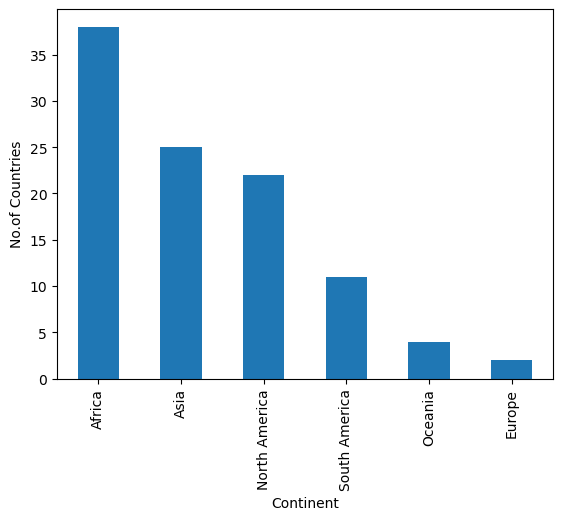

In [41]:
df["Continent"].value_counts().plot(ylabel="No.of Countries", kind="bar")


## Checking for Outliers

C:\Users\Think\AppData\Local\Temp\ipykernel_15984\2425897376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
C:\Users\Think\AppData\Local\Temp\ipykernel_15984\2425897376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production per Person (Kg)"])
C:\Users\Th

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

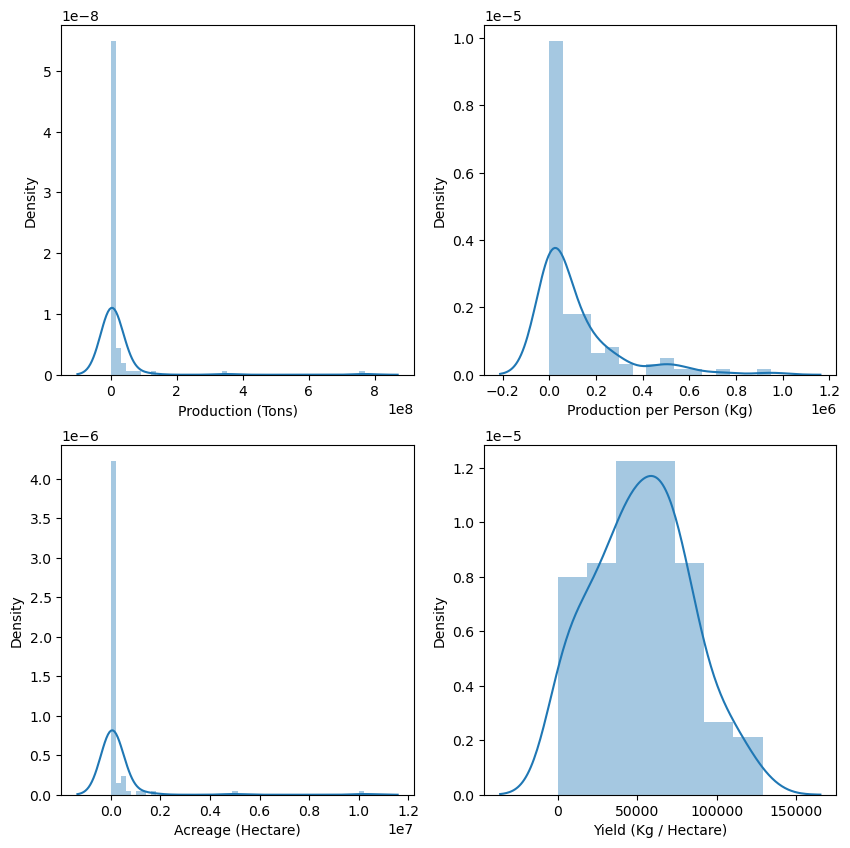

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])

<Axes: ylabel='Yield (Kg / Hectare)'>

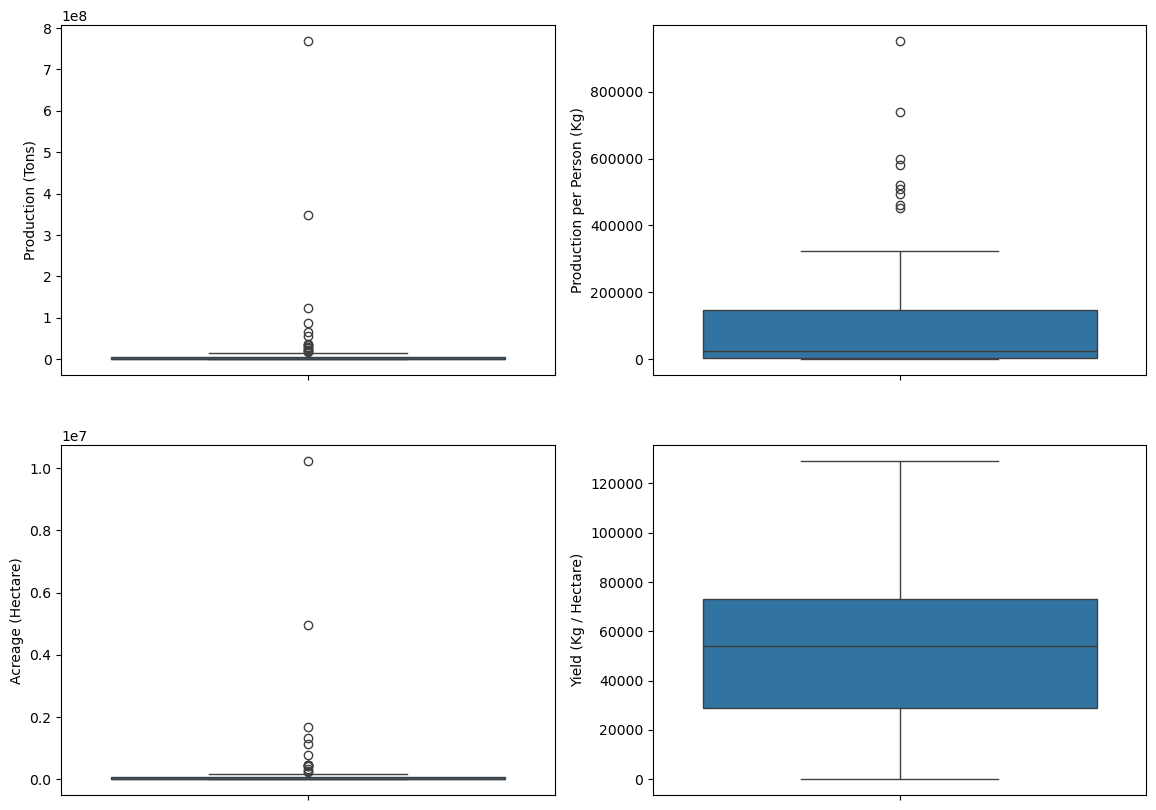

In [44]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])

### Distribution Analysis

In [46]:
df.describe()     
# we can also identify outliers by this function by analysing that there is a huge difference between 75% and max values 
# for all columns except Yield(Kg/ Hectare) 

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Bivariate Analysis

In [48]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Whih Country produces maximum Sugarcane?

In [50]:
df_n = df[["Country", "Production (Tons)"]].set_index("Country")
df_n.head()

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


In [51]:
df_n["Percentage"] = df_n["Production (Tons)"]*100 / df_n["Production (Tons)"].sum()
df_n

,Production (Tons),Percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Percentage'>

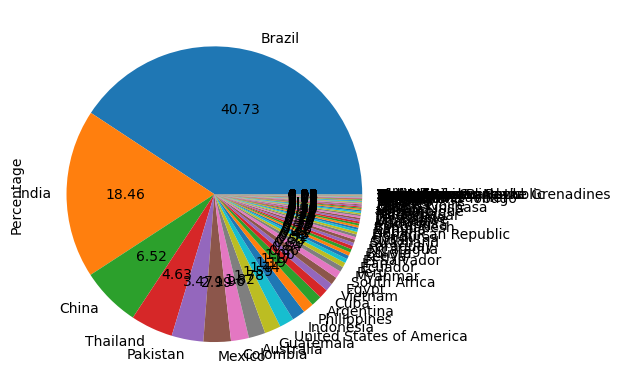

In [52]:
df_n["Percentage"].plot(kind="pie", autopct="%.2f")

#By this we came to Know that 'Brazil' has the maximum production of sugarcane

<Axes: xlabel='Country'>

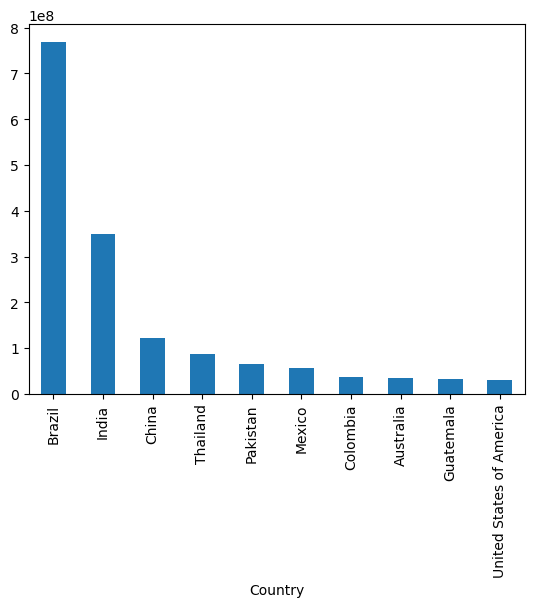

In [53]:
df_n["Production (Tons)"].head(10).plot(kind="bar")

C:\Users\Think\AppData\Local\Temp\ipykernel_15984\3346781820.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


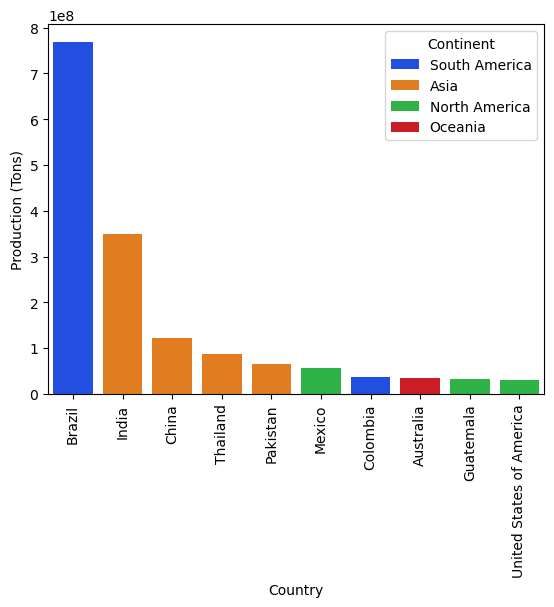

In [54]:
ax=sns.barplot(data=df.head(10), x="Country", y="Production (Tons)", hue="Continent", palette="bright")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Which Country has highest land?

C:\Users\Think\AppData\Local\Temp\ipykernel_15984\3055178628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_acr.head(10), x="Country", y="Acreage (Hectare)", palette="bright")
C:\Users\Think\AppData\Local\Temp\ipykernel_15984\3055178628.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

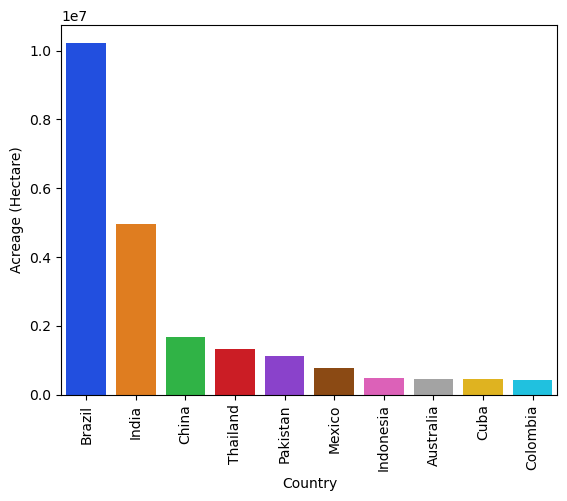

In [56]:
df_acr = df.sort_values("Acreage (Hectare)", ascending =False)
ax=sns.barplot(data=df_acr.head(10), x="Country", y="Acreage (Hectare)", palette="bright")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# By this we get the Top 10 countries with maximum land
# 'Brazil' has the Highest Land

### Which country has the highest Yield per hectare?

C:\Users\Think\AppData\Local\Temp\ipykernel_15984\2803561730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_y.head(10), x="Country", y="Yield (Kg / Hectare)", palette="bright")
C:\Users\Think\AppData\Local\Temp\ipykernel_15984\2803561730.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

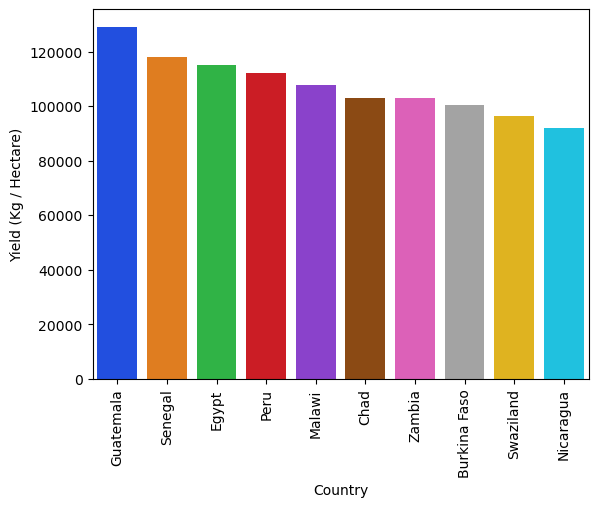

In [58]:
df_y = df.sort_values("Yield (Kg / Hectare)", ascending =False)
ax=sns.barplot(data=df_y.head(10), x="Country", y="Yield (Kg / Hectare)", palette="bright")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# By this we get the Top 10 countries with maximum Yield(in kg) per hectare 
# 'Gautemala' has the Highest Yield per hectare

### Which country has Highest Production?

C:\Users\Think\AppData\Local\Temp\ipykernel_15984\748534329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_p.head(10), x="Country", y="Production (Tons)", palette="bright")
C:\Users\Think\AppData\Local\Temp\ipykernel_15984\748534329.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

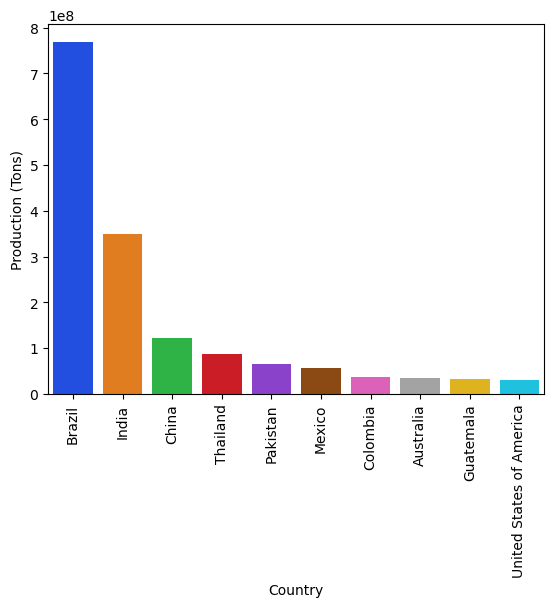

In [60]:
df_p = df.sort_values("Production (Tons)", ascending =False)
ax=sns.barplot(data=df_p.head(10), x="Country", y="Production (Tons)", palette="bright")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# By this we get the Top 10 countries with maximum Production(in Tons)
# 'Brazil' has the Production

## Correlation

In [62]:
num_df = df.select_dtypes(include=['number'])
num_df.corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.015000,0.997550,0.132812
Production per Person (Kg),0.015000,1.000000,0.012557,0.017999
Acreage (Hectare),0.997550,0.012557,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.017999,0.113433,1.000000


### Do countries with highest Land produce more sugarcane?

In [64]:
c = df["Acreage (Hectare)"].corr(df["Production (Tons)"])
c

0.9975501610516623

#### As the correlation between Land and Production is close to 1, we can say that 'Yes' Countries with Highest land produce more Sugarcane. 
#### We can see the correlation by heatmap and scatterplot as well

<Axes: >

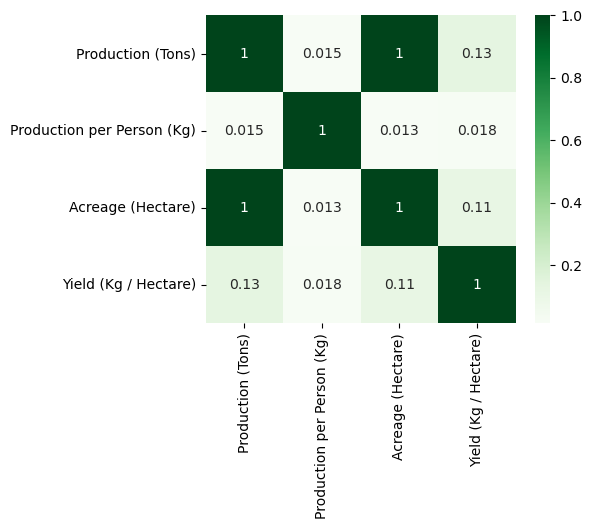

In [81]:
fig=plt.figure(figsize= (5,4))
sns.heatmap(num_df.corr(), annot=True, cmap="Greens")

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

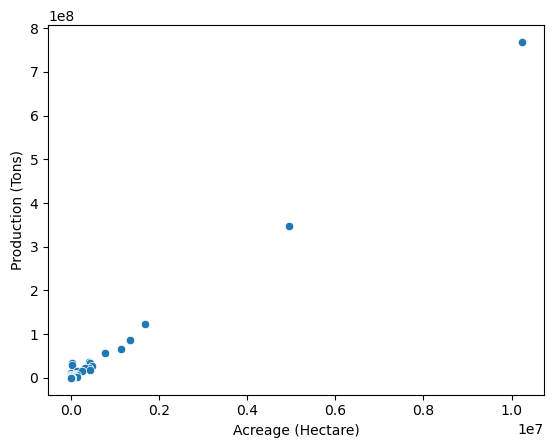

In [83]:
sns.scatterplot(data=num_df, x="Acreage (Hectare)", y="Production (Tons)")	
#This also shows a direct relationship between Land and Production

### Do countries which yield more sugarcane per hectare produces more sugarcane in total?
#### We can see this by scatterplot 

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production (Tons)'>

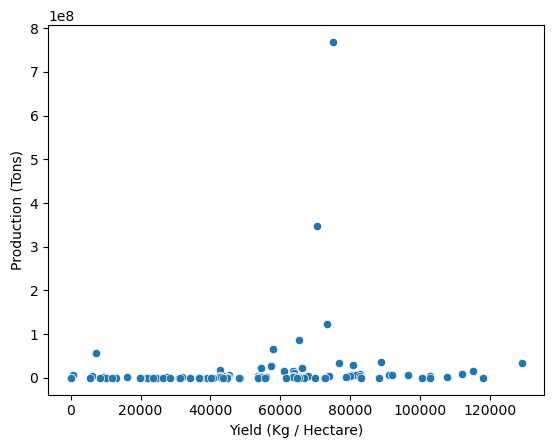

In [85]:
sns.scatterplot(data=num_df, x="Yield (Kg / Hectare)", y="Production (Tons)")	


#### we can se that countries which have more Yield per hectare have less production in total. So 'No', high yield does not mean high Production in total

## Analysis of Continent

In [88]:
df_conti = df.groupby('Continent').sum()
df_conti

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [89]:
df_conti.drop(["Country"], axis=1, inplace=True)
df_conti

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


### Which Continent produces maximum Sugarcane?
#### By the below plot we can see that 'South America' has the maximum production of sugarcane.

<Axes: xlabel='Continent', ylabel='Production (Tons)'>

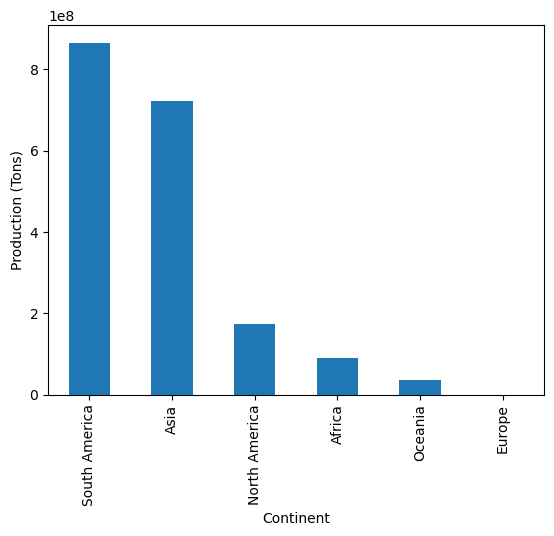

In [91]:
df_conti["Production (Tons)"].sort_values(ascending=False).plot(kind="bar", ylabel="Production (Tons)")

### Do the number of countries in a continent affect the production of sugarcane?

In [93]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

#### We see that 'Africa' has the most countries in it but maximum production is done by 'South America'.So 'No' number of countries does not have an affect of the maximum production of sugarcane.

### Do continent with Highest land produce more sugarcane?

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

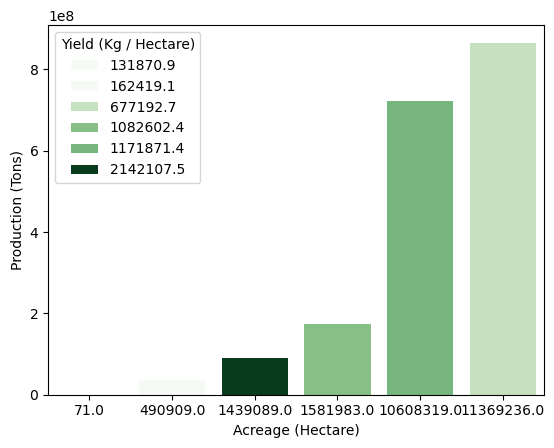

In [96]:
sns.barplot(data=df_conti, x="Acreage (Hectare)", y="Production (Tons)", palette="Greens", hue="Yield (Kg / Hectare)")

#### By the above graph we see that increase in Land increases the production. 'Yes' , continent with highest land has more production

### Production Distribution by Continent

<Axes: ylabel='Production (Tons)'>

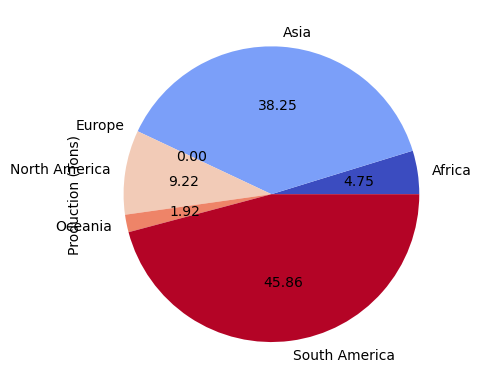

In [99]:
df_conti["Production (Tons)"].plot(kind="pie", autopct="%.2f", colormap="coolwarm")

## Correlation for Continent

In [101]:
df_conti.corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.522211,0.994897,0.091201
Production per Person (Kg),0.522211,1.000000,0.463215,0.542961
Acreage (Hectare),0.994897,0.463215,1.000000,0.111166
Yield (Kg / Hectare),0.091201,0.542961,0.111166,1.000000


<Axes: >

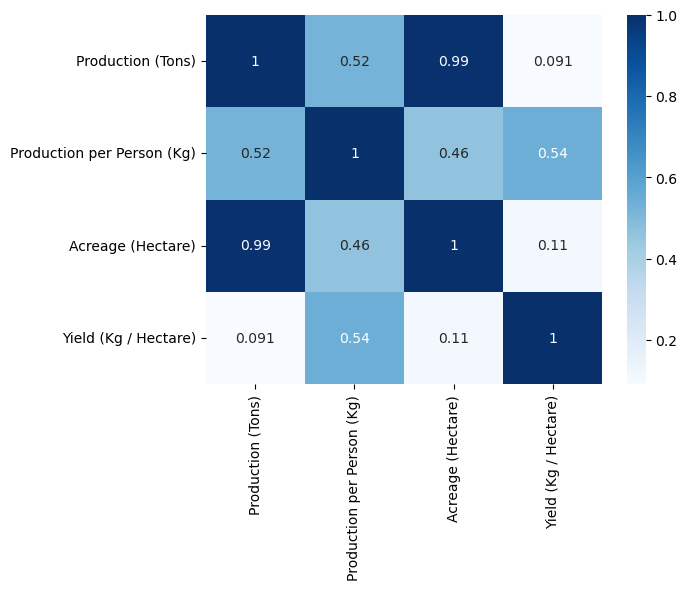

In [102]:
sns.heatmap(df_conti.corr(), annot=True, cmap="Blues")